# Linear Regression With Time Series

[link](https://www.kaggle.com/code/ryanholbrook/linear-regression-with-time-series/tutorial)

## Lectures

After finishing this course, you'll know how to:

engineer features to model the major time series components (trends, seasons, and cycles),
visualize time series with many kinds of time series plots,
create forecasting hybrids that combine the strengths of complementary models, and
adapt machine learning methods to a variety of forecasting tasks.

As part of the exercises, you'll get a chance to participate in our [Store Sales - Time Series Forecasting](https://www.kaggle.com/c/29781) Getting Started competition. In this competition, you're tasked with forecasting sales for _Corporación Favorita_ (a large Ecuadorian-based grocery retailer) in almost 1800 product categories.

### What is a Time Series?

The basic object of forecasting is the time series, which is a set of observations recorded over time. In forecasting applications, the observations are typically recorded with a regular frequency, like daily or monthly.


In [1]:
import pandas as pd
df = pd.read_csv('book_sales.csv',
                 index_col='Date',
                 parse_dates=['Date']).drop('Paperback', axis=1)

In [2]:
df.head()

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


This series records the number of hardcover book sales at a retail store over 30 days. Notice that we have a single column of observations Hardcover with a time index Date.

### Linear Regression with Time Series

For the first part of this course, we'll use the linear regression algorithm to construct forecasting models. Linear regression is widely used in practice and adapts naturally to even complex forecasting tasks.

The __linear regression__ algorithm learns how to make a weighted sum from its input features. For two features, we would have:

`target = weight_1 * feature_1 + weight_2 * feature_2 + bias`

During training, the regression algorithm learns values for the parameters weight_1, weight_2, and bias that best fit the target. (This algorithm is often called ordinary least squares since it chooses values that minimize the squared error between the target and the predictions.) The weights are also called __regression coefficients__ and the bias is also called the __intercept__ because it tells you where the graph of this function crosses the y-axis.

#### Time-step features

There are two kinds of features unique to time series: time-step features and lag features.

Time-step features are features we can derive directly from the time index. The most basic time-step feature is the __time dummy__, which counts off time steps in the series from beginning to end.

In [3]:
import numpy as np
print(len(df.index))
df['Time'] = np.arange(len(df.index))

30


In [4]:
df.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


Linear regression with the time dummy produces the model:

`target = weight * time + bias`

The time dummy then lets us fit curves to time series in a time plot, where Time forms the x-axis.

Text(0.5, 1.0, 'Time plot of Hardcover Scales')

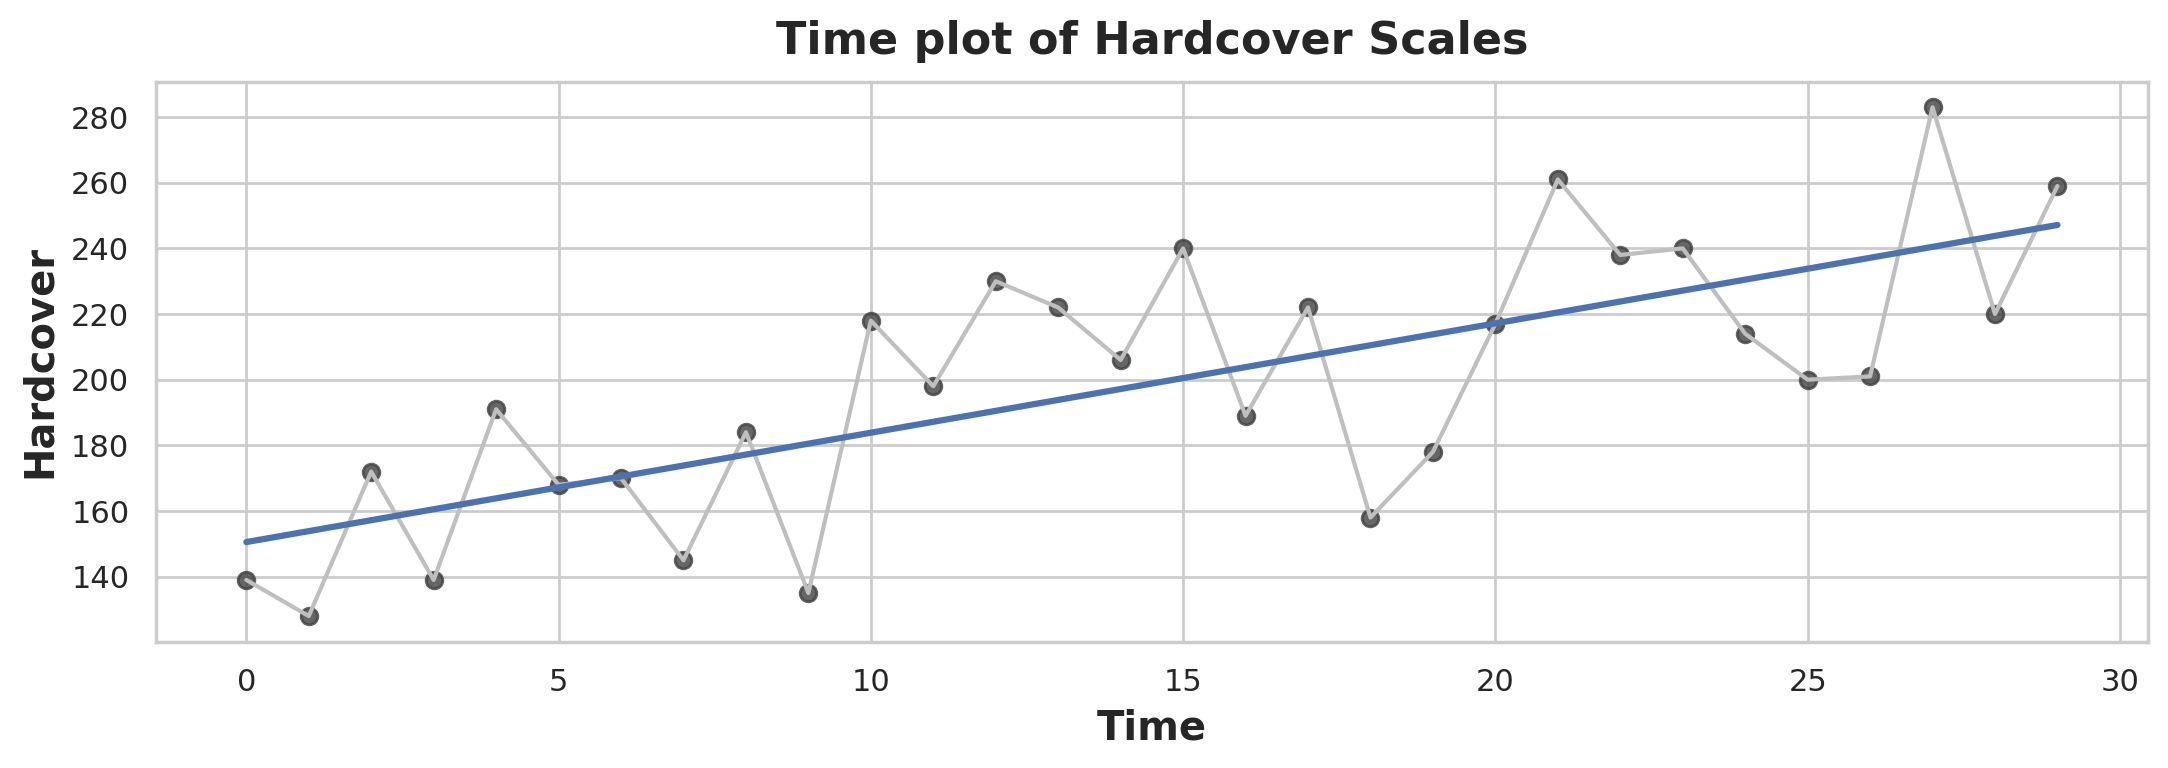

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

plt.rc(group="figure", 
       autolayout=True,
       figsize=(11,4),
       titlesize=18,
       titleweight='bold')

plt.rc(group="axes",
      labelweight='bold',
      labelsize='large',
      titleweight='bold',
      titlesize=16,
      titlepad=10)

%config InlineBackend.figure_format='retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=df, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=df,
                ci=None, scatter_kws=dict(color='0.25'))

ax.set_title('Time plot of Hardcover Scales')

Time-step features let you model __time dependence__. A series is time dependent if its values can be predicted from the time they occured. In the Hardcover Sales series, we can predict that sales later in the month are generally higher than sales earlier in the month.

#### Lag features

To make a __lag feature__ we shift the observations of the target series so that they appear to have occured later in time. Here we've created a 1-step lag feature, though shifting by multiple steps is possible too.

In [6]:
df['Hardcover'].head()

Date
2000-04-01    139
2000-04-02    128
2000-04-03    172
2000-04-04    139
2000-04-05    191
Name: Hardcover, dtype: int64

In [7]:
df['Lag_1'] = df['Hardcover'].shift(1)
df['Lag_1'].head()

Date
2000-04-01      NaN
2000-04-02    139.0
2000-04-03    128.0
2000-04-04    172.0
2000-04-05    139.0
Name: Lag_1, dtype: float64

In [8]:
df = df.reindex(columns=['Hardcover','Lag_1'])
df.head()

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0


Linear regression with a lag feature produces the model:

`target = weight * lag + bias`

So lag features let us fit curves to lag plots where each observation in a series is plotted against the previous observation.

Text(0.5, 1.0, 'Lag Plot of Hardcover Scales')

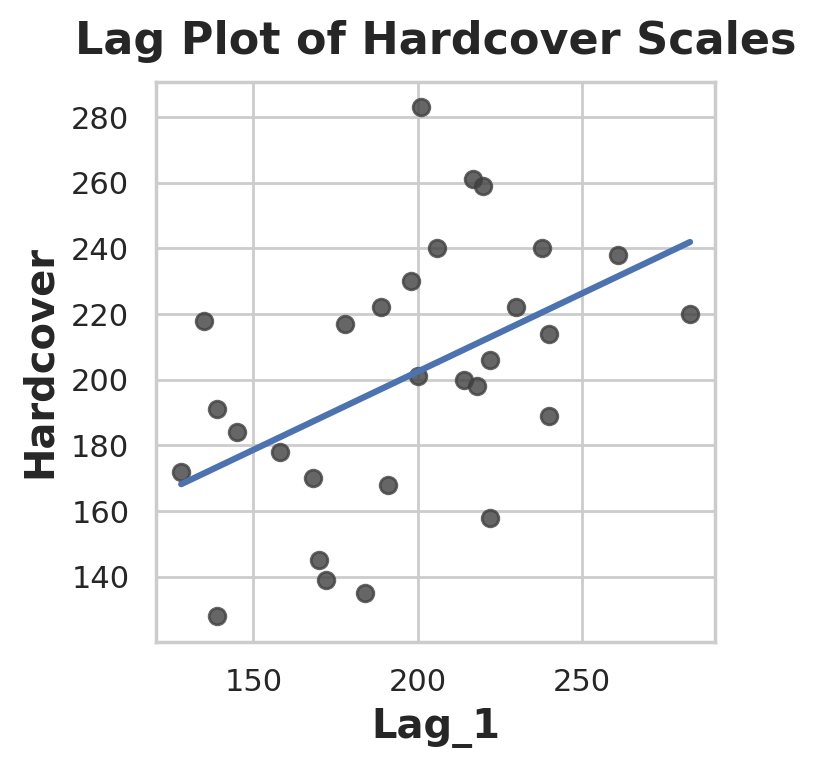

In [9]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Hardcover', data=df, ci=None,
                 scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Scales')

You can see from the lag plot that sales on one day (Hardcover) are correlated with sales from the previous day (Lag_1). When you see a relationship like this, you know a lag feature will be useful.

More generally, lag features let you model __serial dependence__. A time series has serial dependence when an observation can be predicted from previous observations. In Hardcover Sales, we can predict that high sales on one day usually mean high sales the next day.

Adapting machine learning algorithms to time series problems is largely about feature engineering with the time index and lags. For most of the course, we use linear regression for its simplicity, but these features will be useful whichever algorithm you choose for your forecasting task.

### Example - Tunnel Traffic

Tunnel Traffic is a time series describing the number of vehicles traveling through the Baregg Tunnel in Switzerland each day from November 2003 to November 2005. In this example, we'll get some practice applying linear regression to time-step features and lag features.

In [10]:
from warnings import simplefilter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter('ignore') # ignore warnings to clean up output cells

# Setting matplotlib defaults
plt.rc(group="figure", 
       autolayout=True,
       figsize=(11,4))

plt.rc(group="axes",
      labelweight='bold',
      labelsize='large',
      titleweight='bold',
      titlesize=14,
      titlepad=10)

plot_params = dict(
                    color = '0.75',
                    style='.-',
                    markeredgecolor='0.25',
                    markerfacecolor='0.25',
                    legend=False)

%config InlineBackend.figure_format = 'retina'

In [11]:
tunnel = pd.read_csv('tunnel.csv', parse_dates=['Day'])
tunnel = tunnel.set_index("Day")
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [12]:
tunnel = tunnel.to_period()
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


#### Time-step feature

Provided the time series doesn't have any missing dates, we can create a time dummy by counting out the length of the seris.

In [13]:
df = tunnel.copy()
df['Time'] = np.arange(len(tunnel.index))
df.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


The procedure for fitting a linear regression model follows the standard steps for scikit-learn.

In [14]:
from sklearn.linear_model import LinearRegression

# Training data
X = df.loc[:, ['Time']]         # features (stored as dataframe)
y = df.loc[:, 'NumVehicles']    # target (stored as dataframe)

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as the training data
y_pred = pd.Series(model.predict(X), index=X.index)

The model actually created is (approximately): `Vehicles = 22.5 * Time + 98176`. Plotting the fitted values over time shows us how fitting linear regression to the time dummy creates the trend line defined by this equation.

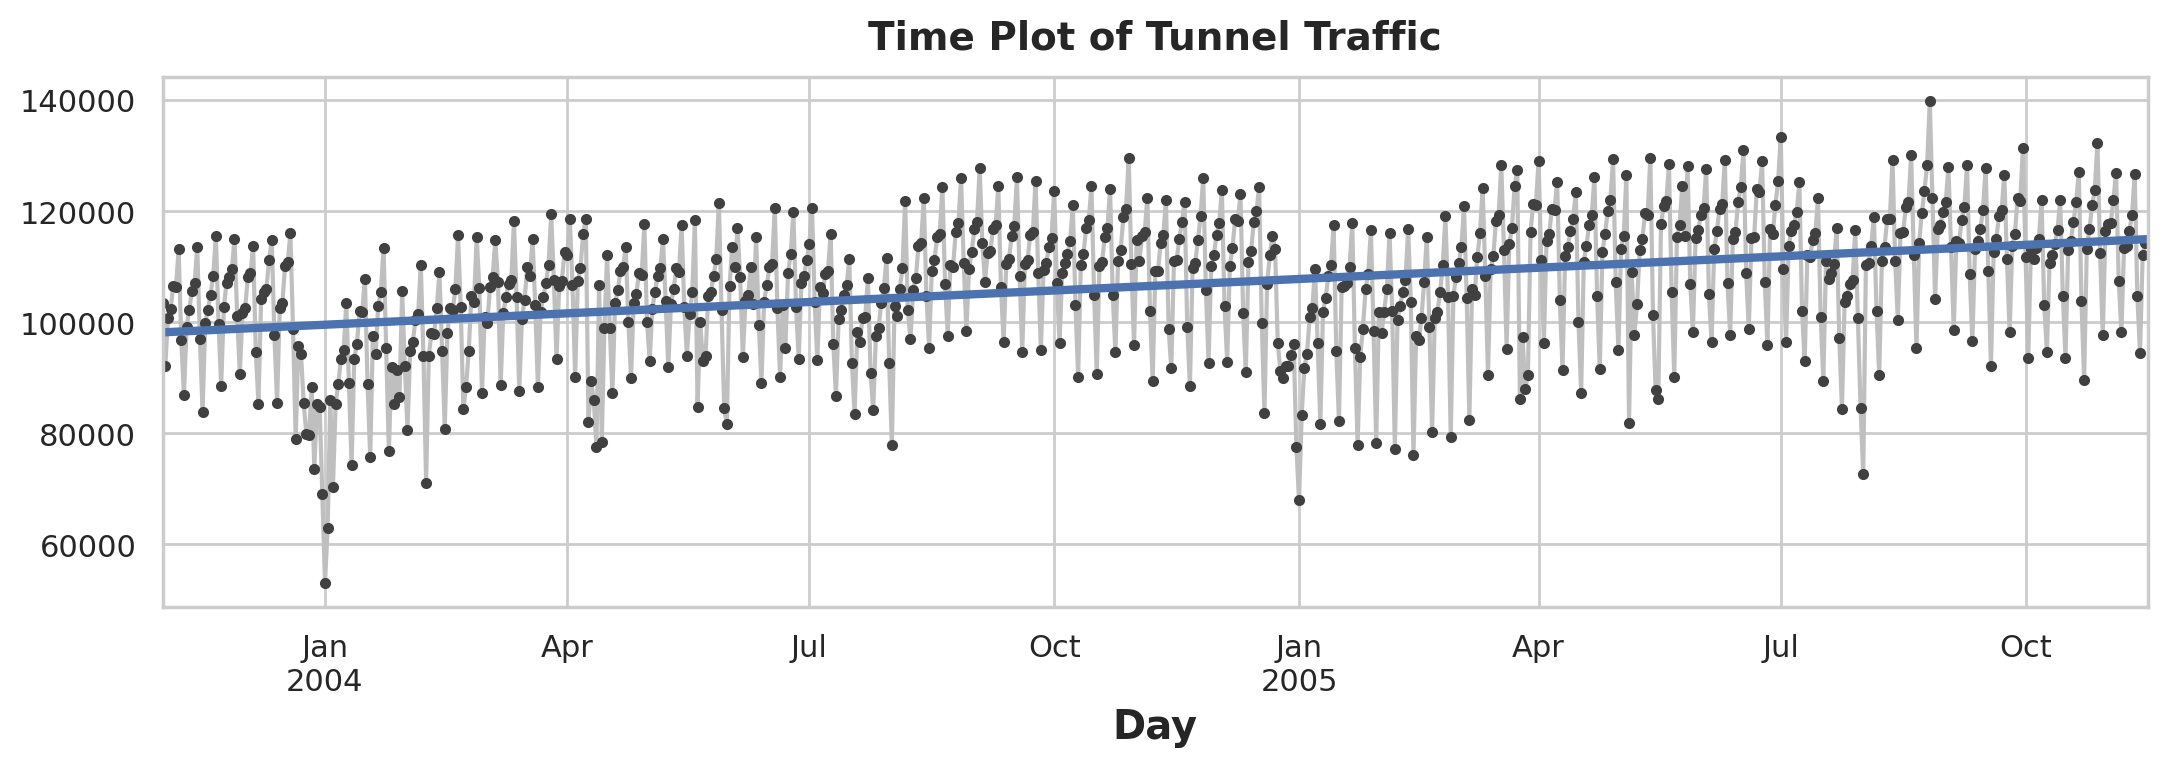

In [15]:
ax = y.plot(**plot_params)           # (**) notation is used to unpack a dictionary, "plot_params"
ax = y_pred.plot(ax=ax, linewidth=3) # straight line
ax.set_title('Time Plot of Tunnel Traffic');

__Lag feature__

Pandas provides us a simple method to lag a series, the `shift` method.

In [16]:
df['Lag_1'] = df['NumVehicles'].shift(1)
df.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


When creating lag features, we need to decide what to do with the missing values produced. Filling them in is one option, maybe with 0.0 or "backfilling" with the first known value. Instead, we'll just drop the missing values, making sure to also drop values in the target from corresponding dates.

In [17]:
from sklearn.linear_model import LinearRegression

X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True)           # drop missing values in the feature set

y = df.loc[:, 'NumVehicles']     # create the target
y,X = y.align(X, join='inner')   # drop corresponding values in target

In [19]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [21]:
y_pred = pd.Series(model.predict(X), index=X.index)
y_pred

Day
2003-11-02    104961.799284
2003-11-03     98840.684037
2003-11-04    103500.939302
2003-11-05    104330.767464
2003-11-06    106578.285356
                  ...      
2005-11-12    117280.776890
2005-11-13    105553.391615
2005-11-14    100105.412508
2005-11-15    109560.763451
2005-11-16    110696.514134
Freq: D, Length: 746, dtype: float64

The lag plot shows us how well we were able to fit the relationship between the number of vehicles one day and the number the previous day.